<center>
    
# **Titanic Survival Analysis**

</center>

In [1]:
# import the important libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

cf.go_offline()
init_notebook_mode(connected = True)
%matplotlib inline

# scikit-learn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# read the dataset
titanic = pd.read_csv('titanic.csv')

In [3]:
# viewing the first 5 rows of data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# viewing the info of the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## The Passengers on the Titanic (Age, Gender, Class, etc.)

D:\Applications\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



Text(0.5, 0.98, 'Each Passenger Class Given Sex')

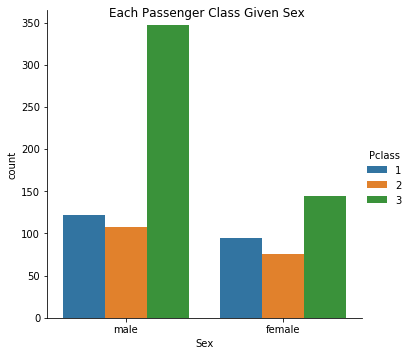

In [5]:
# visualizing bar chart of each passenger class given sex
sns.factorplot(
    x = 'Sex',                
    data = titanic,               
    hue = 'Pclass',                
    kind = 'count'
).fig.suptitle("Each Passenger Class Given Sex")

Text(0.5, 0.98, 'Each Sex Given Passenger Class')

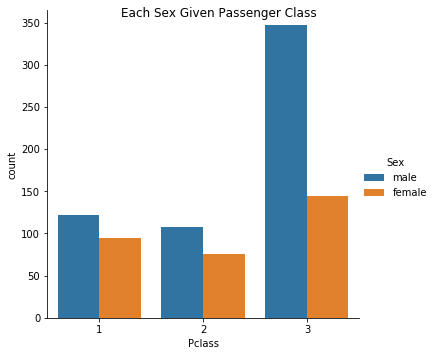

In [6]:
# visualizing bar chart of each sex given each passenger class
sns.factorplot(
    x = 'Pclass',                
    data = titanic,                
    hue = 'Sex',                
    kind = 'count'
).fig.suptitle("Each Sex Given Passenger Class")

- Male passengers are overall more than female passengers.
- More males and females are in the passenger class 3 than any other classes.
- Passenger class 2 has the lowest demand overall.

In [7]:
# to separate men, women, and children
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

Applying person category to find out the amount of people who are children and adult. Children are the ones who are younger than 16 years old.

In [8]:
# apply the function to the table
titanic['Person'] = titanic[['Age', 'Sex']].apply(male_female_child, axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Text(0.5, 0.98, 'Each Category of Person Given Passenger Class')

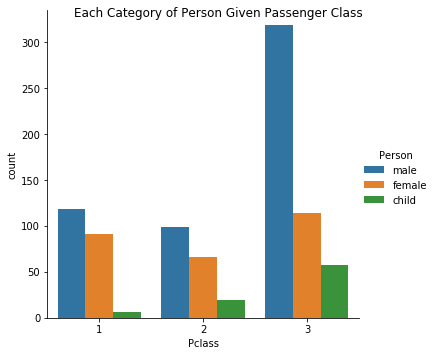

In [9]:
# visualizing male, women and children given passenger class
sns.factorplot(
    x = 'Pclass', 
    data = titanic, 
    hue = 'Person', 
    kind = 'count'
).fig.suptitle("Each Category of Person Given Passenger Class")

- Children category is derived from both males and females.
- More children in passenger class 3 than any other classes.

Text(0.5, 1.0, 'Age Distribution')

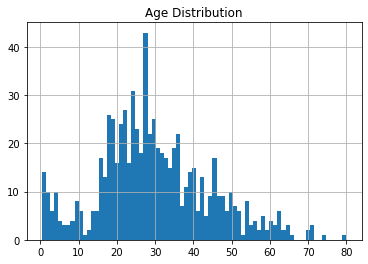

In [10]:
# visualizing age through histogram
titanic['Age'].hist(bins = 75)
plt.title("Age Distribution")

- Most of the passengers are ranging from 20 to 30 years old.
- A lot of children including babies and teenagers are onboard.

In [11]:
# mean of age
titanic['Age'].mean()

29.69911764705882

On average, the passengers' age is 29.7 years old.

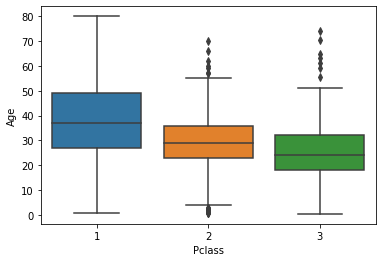

In [12]:
# boxplot of age
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic)

- There are more older people in passenger class 1.
- There are more younger people (children) in passenger class 3.

In [13]:
# count amount of people from each person category
titanic['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

There are 537 adult males, 271 adult females, and 83 children onboards.

Text(0.5, 1, 'Kernel Density Estimate of Both Sexes')

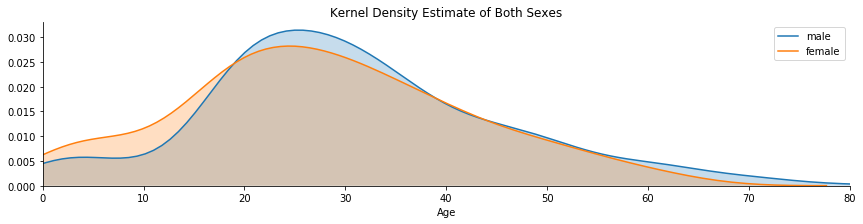

In [14]:
# visualizing kdeplot for sex side by side
fig = sns.FacetGrid(titanic, hue = 'Sex', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)

# x is limited from 0 to oldest age
oldest = titanic['Age'].max()
fig.set(xlim = (0, oldest))

# give the legend to the plot
plt.legend()
plt.title("Kernel Density Estimate of Both Sexes")

Before applying person category:
- More males who are ranging from 20 to 30 years old.
- A lot of children are females.
- A lot of elderly people are males.

Text(0.5, 1, 'Kernel Density Estimate of All Categories of Person')

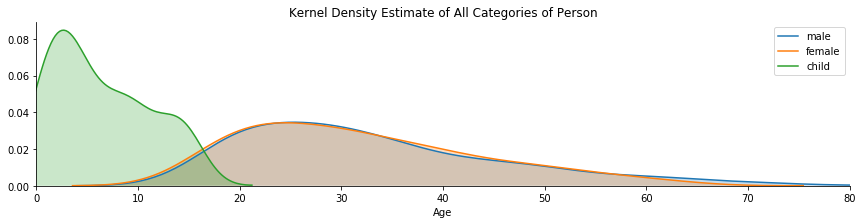

In [15]:
# visualizing kdeplot for person side by side
fig = sns.FacetGrid(titanic, hue = 'Person', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)

# x is limited from 0 to oldest age
oldest = titanic['Age'].max()
fig.set(xlim = (0, oldest))

# give the legend to the plot
plt.legend()
plt.title("Kernel Density Estimate of All Categories of Person")

After applying person category:
- There are more or less the same amount of adult males and adult females onboard.
- There are a lot of chidren onboard, mostly babies and toddlers (0 to 5 years old).

Text(0.5, 1, 'Kernel Density Estimate of All Passenger Classes')

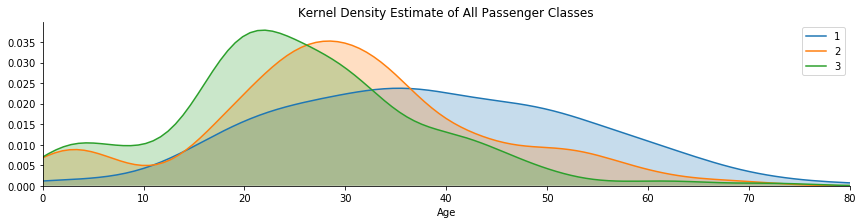

In [16]:
# visualizing kdeplot for passenger class side by side
fig = sns.FacetGrid(titanic,hue = 'Pclass', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)

# x is limited from 0 to oldest age
oldest = titanic['Age'].max()
fig.set(xlim = (0, oldest))

# give the legend to the plot
plt.legend()
plt.title("Kernel Density Estimate of All Passenger Classes")

- Most of the children are in passenger class 2 and 3.
- Over 35% of teenagers and young adults (16 to 25 years old) are in passenger class 3.
- At most 35% of people in passenger class 2 are adults with age ranging from 20 to 35 years old.
- Passenger class 1 has more elderly people than any other passenger classes.
- Passenger class 1 mostly consists of adults from 20 to 50 years old.

## Passengers' Deck, Fare and The Relations with the Class

In [17]:
# displaying fare distribution
titanic['Fare'].iplot(kind = 'hist', bins = 50)

- Most of the people pay less than GBP100 to board Titanic.
- The fee of boarding Titanic is at most GBP530 and 3 people pay for it.
- Less than 50 people pay GBP100 to GBP200 to board.

In [18]:
# drop NaN value from cabin column and input it into deck object
deck = titanic[['Cabin','Pclass', 'Fare']].dropna()

In [19]:
# preview of the deck object
deck.head()

,Cabin,Pclass,Fare
1,C85,1,71.2833
3,C123,1,53.1000
6,E46,1,51.8625
10,G6,3,16.7000
11,C103,1,26.5500


D:\Applications\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



Text(0.5, 1, 'Amount of Passengers in Each Deck')

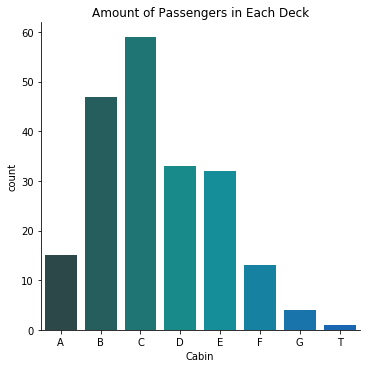

In [20]:
# to get the first letter of the cabin indicating the deck and append it to levels list
levels = []

for level in deck['Cabin']:
    levels.append(level[0])
    
# plot of the levels list
cabin = DataFrame(levels)
cabin.columns = ['Cabin']
sns.factorplot('Cabin', data = cabin, palette = 'winter_d', order = ['A','B','C','D','E','F','G', 'T'], kind = 'count')
plt.title("Amount of Passengers in Each Deck")

- All Decks are divided into Deck A, B, C, D, E, F, G, and T.
- The previous 3 people, who pay GBP530 to board, are most likely board in Deck T.
- For those who pay more than GBP100 are most likely in Deck A, G, and F.

Text(0.5, 1, 'Amount of Passengers in Each Deck Without Deck T')

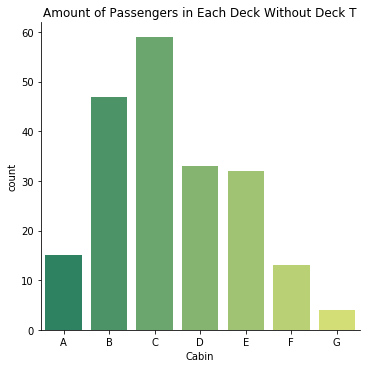

In [21]:
# redefine cabin dataframe and visualize it without deck T
cabin = cabin[cabin.Cabin != 'T']

sns.factorplot('Cabin', data = cabin, palette = 'summer', order = ['A','B','C','D','E','F','G'], kind = 'count')
plt.title("Amount of Passengers in Each Deck Without Deck T")

- Deck T is most likely for passenger class 1 (First Class Suite).
- Deck A, F, G are for passenger class 2 (First Class Berth).
- Deck B, C, D, and E are for passenger class 3 (Second Class Berth).

## Where the Passengers Came from

Text(0.5, 1, 'Cities of Embarkation')

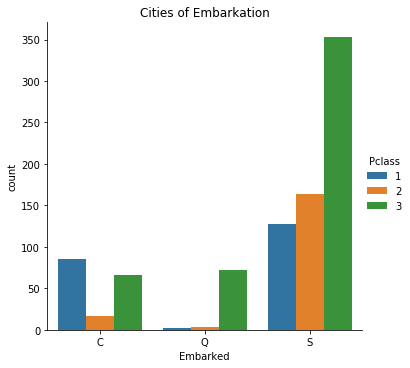

In [22]:
# to know where the passengers come from
sns.factorplot(
    x = 'Embarked',                
    data = titanic,                
    hue = 'Pclass',                
    kind = 'count',   
    order = ['C','Q','S']
)
plt.title("Cities of Embarkation")

<div style = "text-align: justify">
Based on the graph, majority of passengers are from Southhampton (S) followed by Cherbourg(C) and then, Queenstown (Q). In Queenstown, both high and middle class passengers are rare while, in Cherbourg only the middle class passengers are rare.
</div>

## Those Who Were Alone and Those with Family

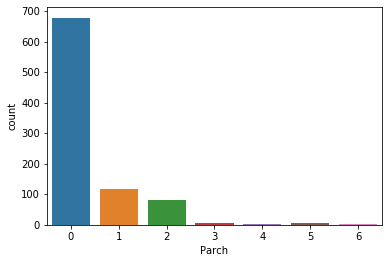

In [23]:
# parents and children onboard
sns.countplot(x = 'Parch', data = titanic)

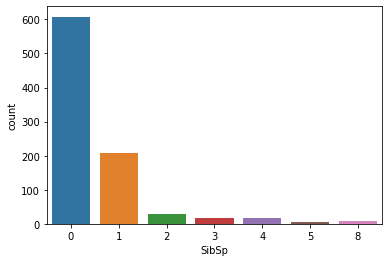

In [24]:
# sibling and spouse count
sns.countplot(x = 'SibSp', data = titanic)

In [25]:
# summing up the sibling and parent-child value
titanic['Alone'] = titanic.SibSp + titanic.Parch

In [26]:
# viewing the result
titanic['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [27]:
# create a new column indicating whether the passenger was travelling alone or 
# with family
titanic['Alone'].loc[titanic['Alone'] > 0] = "With Family"
titanic['Alone'].loc[titanic['Alone'] == 0] = "Alone"

In [28]:
# view the first 5 columns of the new data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


Text(0.5, 1, 'With Family vs Alone')

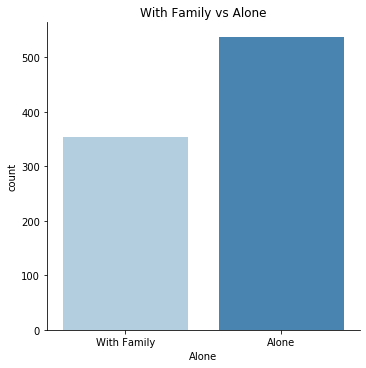

In [29]:
# plot the alone column
sns.factorplot('Alone', data = titanic, palette = "Blues", kind = 'count')
plt.title("With Family vs Alone")

<div style = "text-align: justify">
Firstly, a new column called "Alone" has to be established differentiating those who board alone and with family. Those who board with family can be either with their siblings (SibSp) or parents/children (Parch). If a data of one passenger has zero value in both SibSp and Parch, the passenger travels alone. So, the value in the Alone column is written "Alone". Otherwise, it is to be written "With Family". From the graph, it can be concluded that there are more people who travel alone than those with family.
</div>

## Factors Which Helped Someone Survive the Sinking or Crash of the Titanic

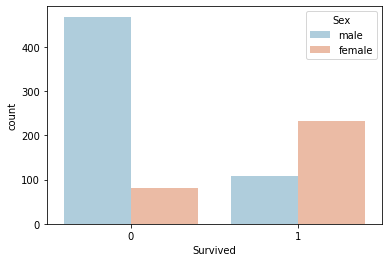

In [30]:
# gender based on survived
sns.countplot(x = 'Survived', hue = 'Sex', data = titanic, palette = 'RdBu_r')

Text(0.5, 1, 'Survivor')

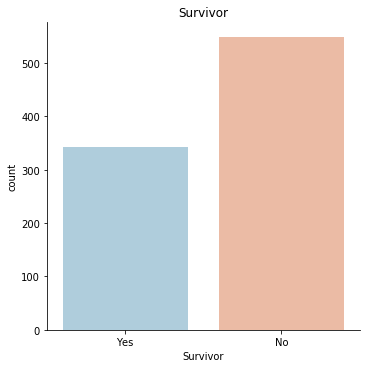

In [31]:
# mapping the survivor
titanic['Survivor'] = titanic.Survived.map(
    {
        0 : 'No',                                          
        1 : "Yes"
    }
)
sns.factorplot(
    x = 'Survivor',               
    data = titanic,               
    palette = 'RdBu_r',                
    order = ['Yes', 'No'], 
    kind = 'count'
)
plt.title("Survivor")

Text(0.5, 1, 'Survivability Based on Passenger Class and Person Category')

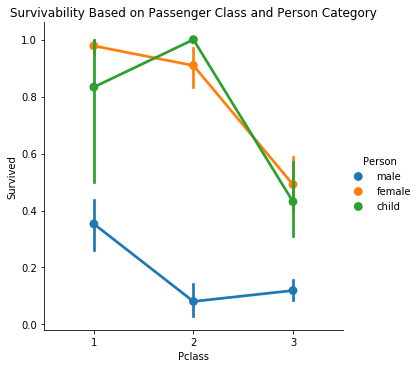

In [32]:
# assessing survivability based on passenger class and person
sns.factorplot('Pclass', 'Survived', hue = 'Person', data = titanic)
plt.title("Survivability Based on Passenger Class and Person Category")

Text(0.5, 1, 'Survivability Based on Age')

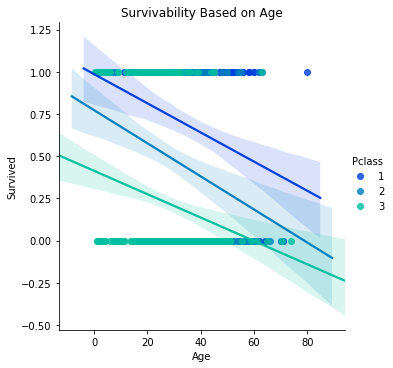

In [33]:
# finding out if age affects survivability
sns.lmplot(
    x = 'Age',      
    y = 'Survived',       
    data = titanic,     
    hue = 'Pclass', 
    palette= 'winter'
)
plt.title("Survivability Based on Age")

Text(0.5, 1, 'Survivability Based on Passengers Class\nSegmented by Generations')

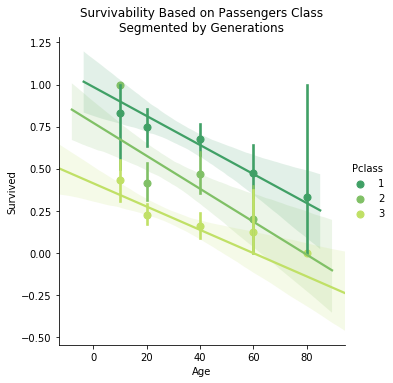

In [34]:
# differentiating gap in x based on generations
generations = [10, 20, 40, 60, 80]

sns.lmplot(
    x = 'Age',           
    y = 'Survived',           
    data = titanic,          
    hue = 'Pclass',           
    palette= 'summer',
    x_bins = generations
)
plt.title("Survivability Based on Passengers Class\nSegmented by Generations")

Text(0.5, 1, 'Survivability Based on Sex Segmented by Generations')

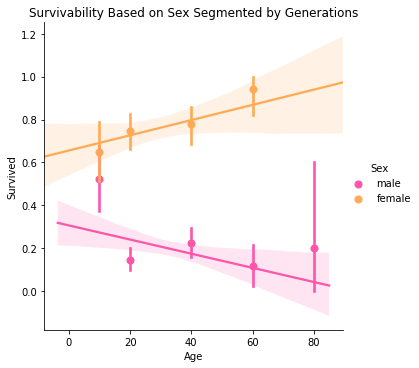

In [35]:
# finding out if age given sex affects survivability
sns.lmplot(
    x = 'Age', 
    y = 'Survived', 
    data = titanic, 
    hue = 'Sex', 
    palette= 'spring',
    x_bins = generations
)
plt.title("Survivability Based on Sex Segmented by Generations")

<div style = "text-align: justify">
From the tragedy, there are people who survived and there are those who did not. The survivability was slim as they were not prepared for the sinking of Titanic. Based on the data, those who survived are marked with value 1 and those who did not are marked with value 0. At that time, they prioritized women and children, so that their survivabilities are quite high. On the other hand, men have low survivability as a result of limited amount of lifeboats on board. Aside from women and children, they also prioritized the high class and middle class passengers resulting in the majority of women and children from high class and middle class survived the tragedy. In addition, those who are older than 40 years old are more unlikely to survive. 
</div>

Linear regression model is not suitable for this data. So, Logistic Regression is used.

In [36]:
# training data
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


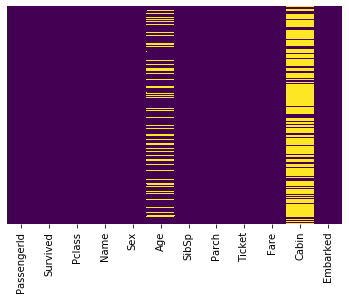

In [37]:
# identifying null value
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [38]:
# imputation for null values (replace null values with the average of the data)
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return train[train['Pclass'] == 1]['Age'].mean()
        elif Pclass == 2:
            return train[train['Pclass'] == 2]['Age'].mean()
        else:
            return train[train['Pclass'] == 3]['Age'].mean()
    else:
        return Age
    
# applying the function
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

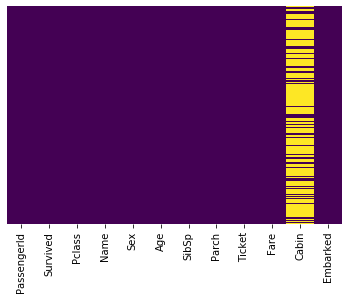

In [39]:
# identifying null value after imputation
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

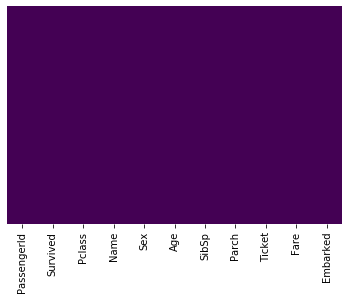

In [40]:
# droping cabin column
train.drop('Cabin', axis = 1, inplace = True)
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [41]:
# getting dummy variables for sex
sex_dummy = pd.get_dummies(train['Sex'], drop_first = True)
sex_dummy.head()

,male
0,1
1,0
2,0
3,0
4,1


In [42]:
# getting dummy variables for embark
embarked_dummy = pd.get_dummies(train['Embarked'], drop_first = True)
embarked_dummy.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [43]:
# concatenating the dummies into training data and droping some variables
train = pd.concat([train, sex_dummy, embarked_dummy], axis = 1)
train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [44]:
# setting x and y
x = train.drop('Survived', axis = 1)
y = train['Survived']

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [45]:
# fitting the model
logreg = LogisticRegression()

logreg.fit(x_train, y_train)

D:\Applications\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# displaying each variable's coefficient
coef = []
for i in logreg.coef_:
    for j in i:
        coef.append(j)
        
coeff_df = pd.DataFrame(coef, x.columns, columns = ['Coefficients'])
coeff_df

,Coefficients
Pclass,-0.724738
Age,-0.025328
SibSp,-0.270244
Parch,-0.094563
Fare,0.007949
male,-2.445873
Q,0.056702
S,-0.231682


In [47]:
# predicting the model
prediction = logreg.predict(x_test)

In [48]:
# classification report
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [49]:
# confusion matrix
conmat = np.array(metrics.confusion_matrix(y_test, prediction))

conlist = []
for i in np.squeeze(conmat):
    conlist.append(i)

matrix = pd.DataFrame(conlist, columns = ['Not Survived', 'Survived']).transpose()
matrix.columns = ['Not Survived', 'Survived']
matrix.transpose()

,Not Survived,Survived
Not Survived,133,21
Survived,40,74


In [50]:
# evaluation metrics
logreg_mae = metrics.mean_absolute_error(y_test, prediction)
logreg_mse = metrics.mean_squared_error(y_test, prediction)
logreg_rmse = np.sqrt(logreg_mse)

print("The Model's Mean Absolute Error = {}\nThe Model's Mean Squared Error = {}\nThe Model's Root Mean Squared Error = {}".format(logreg_mae, logreg_mse, logreg_rmse))

The Model's Mean Absolute Error = 0.22761194029850745
The Model's Mean Squared Error = 0.22761194029850745
The Model's Root Mean Squared Error = 0.47708693159476445
